In [8]:
%matplotlib inline
import os
path = '/root/github/3_SpecialModule'
os.sys.path.append(path)

from Me import *

In [11]:
tf.layers.dense?

# Train Data

# Params

Extracting ./mnist/train-images-idx3-ubyte.gz
Extracting ./mnist/train-labels-idx1-ubyte.gz
Extracting ./mnist/t10k-images-idx3-ubyte.gz
Extracting ./mnist/t10k-labels-idx1-ubyte.gz
(55000, 784)
(55000, 10)


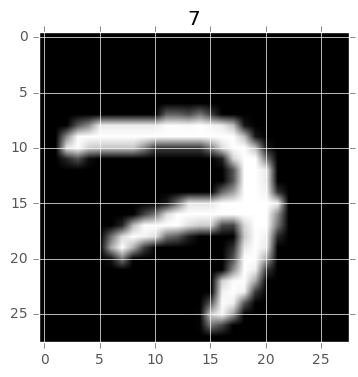

train loss: 2.3004 | test accuracy: 0.17
train loss: 0.0790 | test accuracy: 0.55
train loss: 0.2629 | test accuracy: 0.68
train loss: 0.1382 | test accuracy: 0.75
train loss: 0.1551 | test accuracy: 0.79
train loss: 0.0471 | test accuracy: 0.82
train loss: 0.0382 | test accuracy: 0.84
train loss: 0.0087 | test accuracy: 0.85
train loss: 0.0669 | test accuracy: 0.87
train loss: 0.0483 | test accuracy: 0.88
train loss: 0.0506 | test accuracy: 0.89
train loss: 0.1887 | test accuracy: 0.89
[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number


In [4]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

tf.set_random_seed(1)
np.random.seed(1)

BATCH_SIZE = 50
LR = 0.01              # learning rate

mnist = input_data.read_data_sets('./mnist', one_hot=True)  # they has been normalized to range (0,1)
test_x = mnist.test.images[:2000]
test_y = mnist.test.labels[:2000]

# plot one example
print(mnist.train.images.shape)     # (55000, 28 * 28)
print(mnist.train.labels.shape)   # (55000, 10)
plt.imshow(mnist.train.images[0].reshape((28, 28)), cmap='gray')
plt.title('%i' % np.argmax(mnist.train.labels[0]))
plt.show()

tf_x = tf.placeholder(tf.float32, [None, 28*28])
image = tf.reshape(tf_x, [-1, 28, 28, 1])              # (batch, height, width, channel)
tf_y = tf.placeholder(tf.int32, [None, 10])            # input y

# CNN
conv1 = tf.layers.conv2d(inputs=image, filters=16, kernel_size=5, strides=1, padding='same', activation=tf.nn.relu)           # shape (28, 28, 1)-> (28, 28, 16)
pool1 = tf.layers.max_pooling2d(conv1, pool_size=2, strides=2)           # -> (14, 14, 16)

conv2 = tf.layers.conv2d(pool1, 32, 5, 1, 'same', activation=tf.nn.relu)# -> (14, 14, 32)
pool2 = tf.layers.max_pooling2d(conv2, 2, 2)    # -> (7, 7, 32)

flat = tf.reshape(pool2, [-1, 7*7*32])          # -> (7*7*32, )
output = tf.layers.dense(flat, 10)              # output layer

loss = tf.losses.softmax_cross_entropy(onehot_labels=tf_y, logits=output)           # compute cost
train_op = tf.train.AdamOptimizer(LR).minimize(loss)

accuracy = tf.metrics.accuracy(          # return (acc, update_op), and create 2 local variables
    labels=tf.argmax(tf_y, axis=1), predictions=tf.argmax(output, axis=1),)[1]

sess = tf.Session()
init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer()) # the local var is for accuracy_op
sess.run(init_op)     # initialize var in graph

for step in range(600):
    b_x, b_y = mnist.train.next_batch(BATCH_SIZE)
    _, loss_ = sess.run([train_op, loss], {tf_x: b_x, tf_y: b_y})
    if step % 50 == 0:
        accuracy_ = sess.run(accuracy, {tf_x: test_x, tf_y: test_y})
        print('train loss: %.4f' % loss_, '| test accuracy: %.2f' % accuracy_)

# print 10 predictions from test data
test_output = sess.run(output, {tf_x: test_x[:10]})
pred_y = np.argmax(test_output, 1)
print(pred_y, 'prediction number')
print(np.argmax(test_y[:10], 1), 'real number')

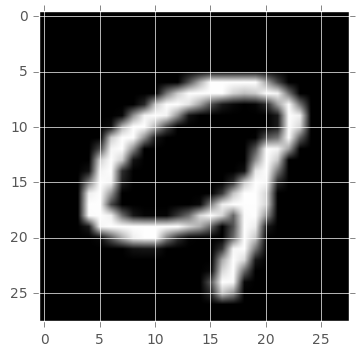

In [5]:
plt.imshow(mnist.train.images[0].reshape((28, 28)), cmap='gray')

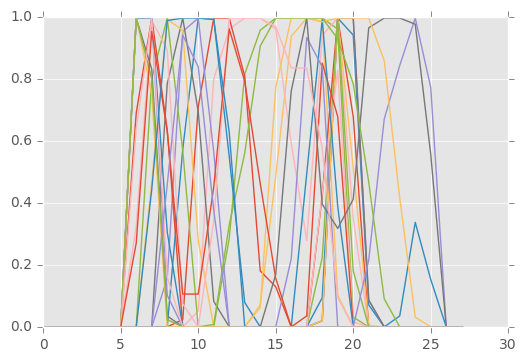

In [6]:
plt.plot(mnist.train.images[0].reshape((28, 28)))